<a href="https://colab.research.google.com/github/Slimlav/Netology/blob/main/%D0%A1%D0%BB%D1%83%D1%87%D0%B0%D0%B9%D0%BD%D1%8B%D0%B5_%D0%BC%D0%B0%D1%80%D0%BA%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B5_%D0%BF%D1%80%D0%BE%D1%86%D0%B5%D1%81%D1%81%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Скачайте текст войны и мир (ссылка на github и гугл диск). Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы “Б” и имеющее длину 8-мь символов**

In [1]:
!pip install hmmlearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from hmmlearn.hmm import GaussianHMM
%matplotlib inline
sns.set()

In [3]:
with open('tom_1.txt', 'r') as f:
    text = f.read().lower()
text = re.sub('[^а-я]',' ', text)

In [4]:
russian = ' абвгдежзийклмнопрстуфхцчшщъыьэюя'
POS = {l: i for i, l in enumerate(russian)}

probabilities = np.zeros((len(russian), len(russian)))

for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

df = pd.DataFrame(probabilities, index=(c for c in russian), columns=(c for c in russian))

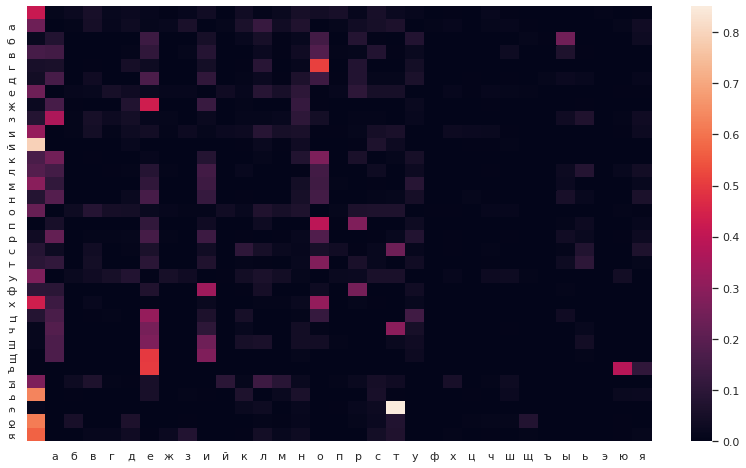

In [5]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

In [6]:
start = POS['п']
end = POS['р']
result =0
count = 0
prior = 1. / len(russian)
for c in russian[1:]:
  for d in russian[1:]:
    proba = prior * probabilities[start, POS[c]] * probabilities[POS[c], POS[d]] * probabilities[POS[d], end] 
    if proba > 0:
        result += proba
        count += 1

print(f'Вероятность слова из 4 букв {result}, всего вариантов слов {count}')  

Вероятность слова из 4 букв 0.0008512988379402289, всего вариантов слов 426


In [7]:
s = []
start = 'б'
s.append(start)
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(russian), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

бы  че кт


**Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM. Попробуйте “построить” (через среднее каждой компоненты) наивный прогноз ряда.**

In [8]:
series = pd.read_csv('weekly-closings-of-the-dowjones-.csv')['Close']
values = series.values.reshape(-1,1)

In [9]:
for n in range(1, 14):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -894.2620483582102
2 -820.6340143849746
3 -786.8374168554234
4 -778.5869958888936
5 -749.9914081701961
6 -780.6090925075284
7 -765.917515130087
8 -733.3827561311141
9 -722.0530966636435


10 -707.4478788334849
11 -736.5822749052898


12 -695.9598428266776
13 -698.7548606008318


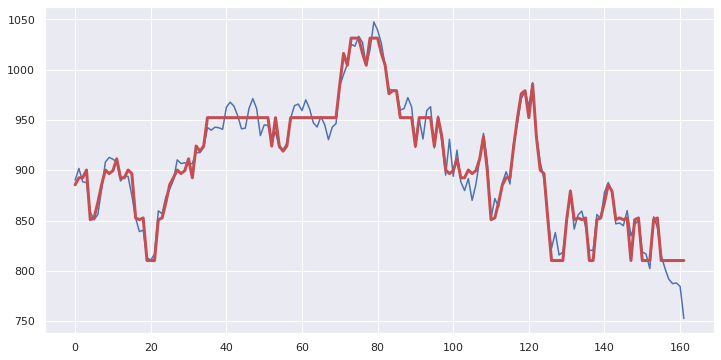

In [12]:
model = GaussianHMM(n_components=22,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3, c='r')

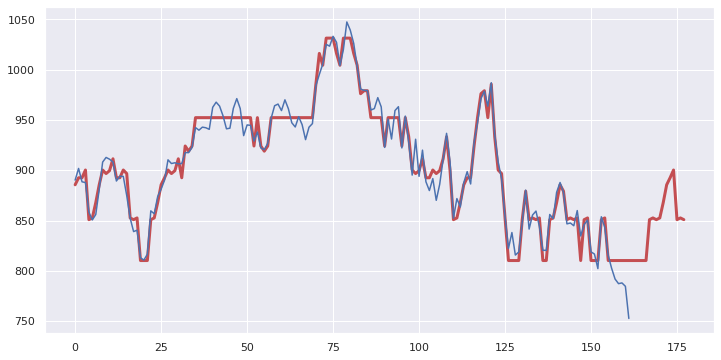

In [13]:
n = 16
prognos = means
last_label = labels[-1]
for i in range(n):
  last_label = np.random.choice(list(range(model.n_components)), p=model.transmat_[last_label])
  prognos = np.concatenate((prognos, model.means_[last_label].reshape(-1,1)))

plt.figure(figsize=(12, 6))
plt.plot(prognos, linewidth=3, c='r')
plt.plot(values)  